In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import statsmodels.formula.api as sf
import numpy as np

In [2]:
t = pd.read_csv('titanik_full_data_1.csv')

In [4]:
t.head()

,PassengerId\tSurvived\tPclass\tName\tSex\tAge\tSibSp\tParch\tTicket\tFare\tCabin\tEmbarked
1\t0\t3\tBraund,Mr. Owen Harris\tmale\t22\t1\t0\tA/5 21171\t7...
2\t1\t1\tCumings,Mrs. John Bradley (Florence Briggs Thayer)\tf...
3\t1\t3\tHeikkinen,Miss. Laina\tfemale\t26\t0\t0\tSTON/O2. 31012...
4\t1\t1\tFutrelle,Mrs. Jacques Heath (Lily May Peel)\tfemale\t3...
5\t0\t3\tAllen,Mr. William Henry\tmale\t35\t0\t0\t373450\t8....


In [5]:
t.columns

Index(['PassengerId\tSurvived\tPclass\tName\tSex\tAge\tSibSp\tParch\tTicket\tFare\tCabin\tEmbarked'], dtype='object')

In [6]:
titanic = pd.read_csv('titanik_full_data_1.csv', sep ='\t')

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Survived or not in numbers')

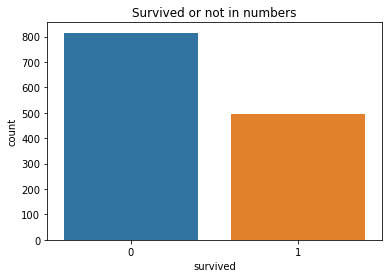

In [17]:
sns.countplot(x = 'Survived', data = titanic)
plt.xlabel('survived')
plt.ylabel('count')
plt.title('Survived or not in numbers')

Применим логистическую регрессию. Here look for more -https://www.statsmodels.org/stable/examples/index.html

About the formula:

1) С помощью С() мы указываем категориальные переменные в формуле.

2) On a left side of ~ we have our dependent variable, on a right side formula

3) Age is not a categorical variable

4) sf.glm() - Create a Model from a formula and dataframe.

5) And we have to point out our model family. In our case - Binominal

In [8]:
logit_res = sf.glm('Survived ~ C(Pclass) + C(Sex) + Age', titanic, family = sm.families.Binomial()).fit()

.summary() - Summarize the Regression Results

In [9]:
#P>\z\ - столбец указывающий на p-уровень значимости который должен быть ниже 0.05
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                            GLM   Df Residuals:                     1041
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.21
Date:                Sat, 13 Feb 2021   Deviance:                       796.42
Time:                        09:10:15   Pearson chi2:                 1.10e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9568      0.372     10.641      0.000       3.228       4.686
C(Pclass)[T.2]    -1.2370      0.256     -4.833      0.000      -1.739      -0.735
C(Pclass)[T.3]    -2.2390      0.256     -8.759      0.000      -2.740      -1.738
C(Sex)[T.male]    -3.5601      0.196    -18.158      0.000      -3.944      -3.176
Age               -0.0313      0.007     -4.407      0.000      -0.045      -0.017
==================================================================================
"""

Text(0.5, 1.0, 'Passangers classes')

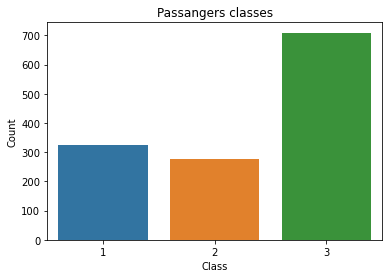

In [10]:
sns.countplot(x = 'Pclass', data = titanic)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Passangers classes')

In [11]:
multi_res = sf.mnlogit('Pclass ~ C(Sex) + Age', titanic).fit()

Optimization terminated successfully.
         Current function value: 0.944697
         Iterations 5


In [12]:
multi_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Pclass   No. Observations:                 1046
Model:                        MNLogit   Df Residuals:                     1040
Method:                           MLE   Df Model:                            4
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                  0.1028
Time:                        09:10:23   Log-Likelihood:                -988.15
converged:                       True   LL-Null:                       -1101.4
Covariance Type:            nonrobust   LLR p-value:                 7.608e-48
==================================================================================
      Pclass=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4181      0.253      5.611      0.000       0.923       1.913
C(Sex)[T.male]     0.4934      0.183      2.691      0.007       0.134       0.853
Age               -0.0522      0.007     -7.728      0.000      -0.065      -0.039
----------------------------------------------------------------------------------
      Pclass=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6021      0.239     10.900      0.000       2.134       3.070
C(Sex)[T.male]     1.0119      0.174      5.824      0.000       0.671       1.352
Age               -0.0843      0.007    -12.514      0.000      -0.098      -0.071
==================================================================================
"""

In [13]:
credit = pd.read_csv('credit_card__1_.csv')

In [14]:
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


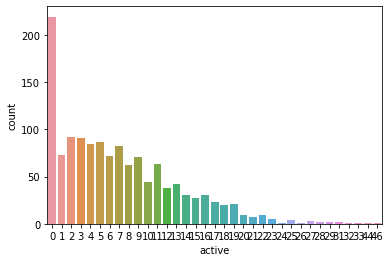

In [15]:
sns.countplot('active', data = credit)

Итак сначало по распределению Пуасона

In [16]:
pois = sf.glm('active ~ age +income +expenditure + C(owner) + C(selfemp)', family = sm.families.Poisson(), data = credit).fit()

In [17]:
pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5614.4
Date:                Sat, 13 Feb 2021   Deviance:                       7142.4
Time:                        09:10:30   Pearson chi2:                 6.89e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4000      0.037     37.440      0.000       1.327       1.473
C(owner)[T.yes]       0.4033      0.023     17.409      0.000       0.358       0.449
C(selfemp)[T.yes]     0.0141      0.040      0.355      0.723      -0.064       0.092
age                   0.0062      0.001      5.648      0.000       0.004       0.008
income                0.0361      0.006      5.752      0.000       0.024       0.048
expenditure        2.925e-05   3.75e-05      0.779      0.436   -4.43e-05       0.000
=====================================================================================
"""

In [18]:
pois.pearson_chi2/pois.df_resid

5.249939996924344

Теперь работаем с отрицательным биноминальным распределением

Когда строим модель, обращаем внимание на аргумент alpha - это параметр дисперсии. От него зависит сходимость результатов, поэтому в случае ошибок рекомендуется ставить его в диапазоне от 0.1 до 2.

In [19]:
neg = sf.glm('active ~ age +income +expenditure + C(owner) + C(selfemp)', family = sm.families.NegativeBinomial(alpha = 0.15), data = credit).fit()

In [20]:
neg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4429.3
Date:                Sat, 13 Feb 2021   Deviance:                       3940.9
Time:                        09:10:34   Pearson chi2:                 3.44e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.3690      0.054     25.206      0.000       1.263       1.475
C(owner)[T.yes]       0.3984      0.033     11.996      0.000       0.333       0.463
C(selfemp)[T.yes]     0.0055      0.059      0.094      0.925      -0.110       0.121
age                   0.0069      0.002      4.263      0.000       0.004       0.010
income                0.0393      0.010      4.099      0.000       0.021       0.058
expenditure        2.445e-05   5.63e-05      0.434      0.664   -8.59e-05       0.000
=====================================================================================
"""

In [21]:
neg.pearson_chi2/neg.df_resid

2.6196780724868898

Опять больше 1

Так..... Теперь я буду применять информационный критерий - критерий Акике 

Его абсолютное знаечение - бессмысленно. Его применяют для сравнения 2-х моделей. 

Чем он ниже, тем лучше модель

In [22]:
print(pois.aic)
print(neg.aic)

11240.817775454603
8870.632884339044


Итак, предикативная способность  негативно-биноминальной модели - хуже

Регрессия с избытком нулей

In [23]:
# where - Return elements chosen from `x` or `y` depending on `condition`
credit.owner = np.where(credit.owner == 'yes', 1,0)
credit.selfemp = np.where(credit.selfemp == 'yes', 1,0)
#замена данных с yes/no на 1/0 для избежания ошибок

Y = credit.active #ЗП
X = credit.loc[:, ['owner', 'selfemp', 'age', 'income', 'expenditure']] #НП
X = sm.add_constant(X) #добавляем константу что бы в формуле был интерсепт

In [24]:
#Итак теперь модель строим

#поизучать эту строку подольше!!!!
zero_inf = sm.ZeroInflatedPoisson(Y,X).fit(maxiter = 100, method = 'ncg')

Optimization terminated successfully.
         Current function value: 3.899929
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Hessian evaluations: 4


C:\Users\vbada\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [26]:
zero_inf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                  active   No. Observations:                 1319
Model:             ZeroInflatedPoisson   Df Residuals:                     1313
Method:                            MLE   Df Model:                            5
Date:                 Sat, 13 Feb 2021   Pseudo R-squ.:                -0.05893
Time:                         09:10:49   Log-Likelihood:                -5144.0
converged:                        True   LL-Null:                       -4857.8
Covariance Type:             nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const     0.0999      0.055      1.812      0.070      -0.008       0.208
const             1.7967      0.037     48.172      0.000       1.724       1.870
owner             0.0017      0.023      0.073      0.942      -0.043       0.046
selfemp           0.0008      0.039      0.022      0.983      -0.075       0.077
age               0.0093      0.001      8.656      0.000       0.007       0.011
income            0.0019      0.007      0.280      0.779      -0.011       0.015
expenditure       0.0001   3.81e-05      2.691      0.007    2.79e-05       0.000
=================================================================================
"""

In [28]:
print(pois.aic)
print(neg.aic)
print(zero_inf.aic)

11240.817775454603
8870.632884339044
10300.01303290444


И то же самое с отриательным биноминальным??? Мы же его уже строили, не??

In [29]:
zero_inf_2 = sm.ZeroInflatedNegativeBinomialP(Y,X).fit(maxiter = 100, method = 'ncg')

Optimization terminated successfully.
         Current function value: 3.055914
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
         Hessian evaluations: 5


In [30]:
zero_inf_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                            active   No. Observations:                 1319
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     1313
Method:                                      MLE   Df Model:                            5
Date:                           Sat, 13 Feb 2021   Pseudo R-squ.:                -0.03018
Time:                                   09:13:22   Log-Likelihood:                -4030.7
converged:                                  True   LL-Null:                       -3912.7
Covariance Type:                       nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -0.5152      0.058     -8.820      0.000      -0.630      -0.401
const             1.4543      0.087     16.765      0.000       1.284       1.624
owner             0.3590      0.050      7.112      0.000       0.260       0.458
selfemp           0.0029      0.090      0.032      0.974      -0.173       0.178
age               0.0097      0.003      3.757      0.000       0.005       0.015
income            0.0352      0.016      2.234      0.026       0.004       0.066
expenditure    5.109e-05   9.08e-05      0.563      0.573      -0.000       0.000
alpha             0.4517      0.032     14.330      0.000       0.390       0.514
=================================================================================
"""

In [31]:
print(pois.aic)
print(neg.aic)
print(zero_inf.aic)
print(zero_inf_2.aic)

11240.817775454603
8870.632884339044
10300.01303290444
8073.499821478159


In [32]:
#ну, выходит, что zero_inf_2 - лучше всего остального

Перехожу к анализу выживаемости. Для него нужен пакет lifelines

In [33]:
import lifelines as lf

In [34]:
churn = pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')

In [35]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
churn = churn.loc[:, ['Churn', 'tenure', 'SeniorCitizen', 'Dependents', 'MonthlyCharges', 'PaperlessBilling']]

In [40]:
churn.head()

,Churn,tenure,SeniorCitizen,Dependents,MonthlyCharges,PaperlessBilling
0,No,1,0,No,29.85,Yes
1,No,34,0,No,56.95,No
2,Yes,2,0,No,53.85,Yes
3,No,45,0,No,42.30,No
4,Yes,2,0,No,70.70,Yes


- **Churn** - ушёл клиент или нет
- **tenure** - сколько месяцев пробыл с компанией
- **SeniorCitizen** - клиент пожилой или нет
- **Dependents** - есть иждивенцы в семье или нет
- **MonthlyCharges** - сколько клиент платит в месяц
- **PaperlessBilling** - оплата с чеком или бесчековая

Text(0.5, 0, 'ушел ли клиент')

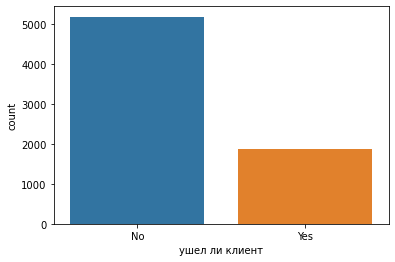

In [41]:
sns.countplot(x='Churn', data = churn)
plt.xlabel('ушел ли клиент')

Text(0.5, 1.0, 'Сколько времени клиенты провели с компанией')

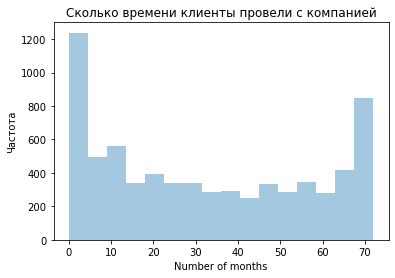

In [44]:
#kde - Whether to plot a gaussian kernel density estimate.
sns.distplot(churn.tenure, kde = False)
plt.xlabel('Number of months')
plt.ylabel('Частота')
plt.title('Сколько времени клиенты провели с компанией')

In [45]:
churn.tenure = churn.tenure + 0.001 #это делается для исключения нулевых месяцев
churn.Churn = np.where(churn.Churn == 'Yes', 1,0) #перекодировали в числа
churn.SeniorCitizen = np.where(churn.SeniorCitizen == 1, 'Yes', 'No') #наоборот, но зачем???

Тепрь же строим модель. Но что надо указать? Ей нужно указать данные, колонку с событием и опциональную формулу

In [46]:
surv = lf.WeibullAFTFitter()
#This class implements a Weibull AFT model. The model has parameterized
#form, with :math:`\lambda(x) = \exp\left(\beta_0 + \beta_1x_1 + ... + \beta_n x_n \right)`,

surv.fit(df = churn, duration_col = 'tenure', event_col = 'Churn',\
         formula = 'C(SeniorCitizen) + C(Dependents) + MonthlyCharges + C(PaperlessBilling)')

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>

In [47]:
surv.print_summary()

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
   number of observations = 7043
number of events observed = 1869
           log-likelihood = -10355.96
         time fit was run = 2021-02-13 07:02:37 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                          
lambda_ Intercept                    5.84     344.19       0.12             5.61             6.08               272.31               435.03
        C(Dependents)[T.Yes]         1.21       3.34       0.10             1.02             1.40                 2.76                 4.05
        C(PaperlessBilling)[T.Yes]  -0.91       0.40       0.09            -1.08            -0.74                 0.34                 0.48
        C(SeniorCitizen)[T.Yes]     -0.38       0.69       0.09            -0.54            -0.21                 0.58                 0.81
        MonthlyCharges              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
rho_    Intercept                   -0.43       0.65       0.02            -0.47            -0.39                 0.63                 0.68

                                        z      p   -log2(p)
param   covariate                                          
lambda_ Intercept                   48.88 <0.005        inf
        C(Dependents)[T.Yes]        12.38 <0.005     114.48
        C(PaperlessBilling)[T.Yes] -10.31 <0.005      80.37
        C(SeniorCitizen)[T.Yes]     -4.44 <0.005      16.75
        MonthlyCharges              -0.85   0.39       1.35
rho_    Intercept                  -20.70 <0.005     313.93
---
Concordance = 0.62
AIC = 20723.91
log-likelihood ratio test = 441.19 on 4 df
-log2(p) of ll-ratio test = 310.46

https://www.youtube.com/watch?v=1-ADJNE1WNc&list=PLAgRFWQlLxEcXgNIl9aLg9bPY0irX5_qW&index=21&t=4028s -тут видео гайд по этому ноутбуку

* Переменная из двух категорий – биномиальная регрессия
* Категорий больше – мультиномиальная
* В категориях есть явное убывание или нарастание – порядковая
* Считаем количество чего-то – Пуассоновская
  - Дисперсия больше среднего – отрицательно-биномиальная
  Слишком много нулей – zero-inflated-модель
* У нас есть какое-то событие и время до него – анализ выживаемости
